## Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

We expect that many of you will have some experience with Python and numpy; for the rest of you, this section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for Matlab users page (https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

### Python versions

There are currently two different supported versions of Python, 2.7 and 3.4. Somewhat confusingly, Python 3.0 introduced many backwards-incompatible changes to the language, so code written for 2.7 may not work under 3.4 and vice versa. For this class all code will use Python 2.7.

You can check your Python version at the command line by running `python --version`.

### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [75]:
x = 3
print(x, type(x))

3 <class 'int'>


In [76]:
print(x + 1)   # Addition;
print(x - 1)   # Subtraction;
print(x * 2)   # Multiplication;
print(x ** 2)  # Exponentiation;

4
2
6
9


In [77]:
x += 1 # x = x+1
print(x)  # Prints "4"
x *= 2 # x = x*2
print(x)  # Prints "8"

4
8


In [78]:
y = 2.5
print(type(y)) # Prints "<type 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [79]:
t, f = True, False
print(type(t),t,f) # Prints "<type 'bool'>"

<class 'bool'> True False


Now we let's look at the operations:

In [80]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### Strings

In [81]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print(hello, len(hello))

hello 5


In [82]:
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"

hello world


In [11]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
    

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/2/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [12]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print xs[-1]     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [83]:
xs[2] = 'foo'    # Lists can contain elements of different types
xs[1] = 1.1
print(xs)

[3, 1.1, 'foo']


In [14]:
xs.append('bar') # Add a new element to the end of the list
print(xs)  

[3, 1, 'foo', 'bar']


In [15]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs) 

bar [3, 1, 'foo']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/2/tutorial/datastructures.html#more-on-lists).

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [84]:
nums = [0,1,2,3,4]    # range is a built-in function that creates a list of integers
print(nums )        # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]


#### Loops

You can loop over the elements of a list like this:

In [85]:
animals = ['cat', 'dog', 'monkey']
for i in animals:
    print(i)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [89]:
animals = ['cat', 'dog', 'monkey']
for i, j in enumerate(animals):
    print(i, j)

0 cat
1 dog
2 monkey


### Functions

Python functions are defined using the `def` keyword. For example:

In [97]:
def sign(x):
    if x > 0:
      return 'positive'
    elif x < 0:
      return 'negative'
    else:
       return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [100]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [102]:
x = [1,2,3]
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a),type(x), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> <class 'list'> (3,) 1 2 3
[5 2 3]


In [46]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [47]:
print(b.shape)                 
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [104]:
a = np.zeros((2,3))  # Create an array of all zeros
print(a,type(a))

[[ 0.  0.  0.]
 [ 0.  0.  0.]] <class 'numpy.ndarray'>


In [49]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[ 1.  1.]]


In [50]:
c = np.full((2,2), 7) # Create a constant array
print(c) 

[[7 7]
 [7 7]]


In [105]:
d = np.eye(5)        # Create a 2x2 identity matrix
print(d)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [52]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[ 0.72027499  0.82752901]
 [ 0.5726961   0.1042542 ]]


### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [55]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [56]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [60]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [61]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [62]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [63]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [64]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [65]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [66]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [67]:
x = np.array([[1,2],[3,4]])

print(np.sum(x)) # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [68]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [69]:
v = np.array([[1,2,3]])
print(v)
print(v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [70]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [71]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

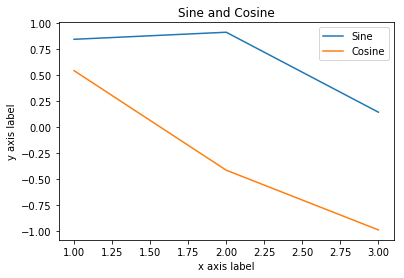

In [109]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])